# Limpieza de datos de cartas de Hearthstone

## Bibliotecas

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Cargando los datos

In [69]:
hs_cards = pd.read_csv("cards_flat.csv", encoding='iso-8859-1')
hs_cards.head()

,id,player_class,type,name,set,text,cost,attack,health,rarity,...,mechanics,dust,play_requirements,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability,entourage
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,...,NaN,NaN,{'REQ_NUM_MINION_SLOTS': 1},NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,...,NaN,"[40, 400, 5, 50]",NaN,BEAST,NaN,NaN,NaN,NaN,NaN,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,...,['BATTLECRY'],"[1600, 3200, 400, 1600]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,...,NaN,"[40, 400, 5, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Muestra de unicos para ver de que deshacernos

In [70]:
types = hs_cards.type.unique()
mech = hs_cards.mechanics.unique()
req = hs_cards.play_requirements.unique()
tat = hs_cards.targeting_arrow_text.unique()
dur = hs_cards.durability.unique()
print("Type:", types)
print("\nMechanics:", mech)
print("\nPlay requirements:", req)
print("\nTargeting_arrow_text:", tat)
print("\nDurability:", dur)

Type: ['SPELL' 'MINION' 'ENCHANTMENT' 'HERO' 'HERO_POWER' 'WEAPON' nan]

Mechanics: [nan "['BATTLECRY']" "['TAG_ONE_TURN_EFFECT']"
 "['EVIL_GLOW', 'ImmuneToSpellpower']" "['DEATHRATTLE']"
 "['CHOOSE_ONE', 'TAUNT']" "['AURA']" "['JADE_GOLEM']" "['AI_MUST_PLAY']"
 "['TAUNT']" "['TOPDECK', 'ImmuneToSpellpower']"
 "['DIVINE_SHIELD', 'TAUNT']" "['INSPIRE']" "['SECRET']"
 "['BATTLECRY', 'DEATHRATTLE']" "['CHOOSE_ONE', 'JADE_GOLEM']"
 "['EVIL_GLOW']" "['BATTLECRY', 'JADE_GOLEM']"
 "['DEATHRATTLE', 'DIVINE_SHIELD', 'TAUNT']" "['CHARGE']" "['AUTOATTACK']"
 "['ADJACENT_BUFF', 'AURA']" "['ENRAGED']" "['ImmuneToSpellpower']"
 "['CHARGE', 'DIVINE_SHIELD']" "['InvisibleDeathrattle']"
 "['BATTLECRY', 'FREEZE']" "['COMBO']" "['SECRET', 'ImmuneToSpellpower']"
 "['AURA', 'InvisibleDeathrattle']" "['MORPH']"
 "['TAUNT', 'InvisibleDeathrattle']" "['WINDFURY']" "['CHOOSE_ONE']"
 "['CANT_ATTACK']" "['DIVINE_SHIELD']"
 "['TAUNT', 'CANT_BE_TARGETED_BY_SPELLS', 'CANT_BE_TARGETED_BY_HERO_POWERS']"
 "['BATTLECRY

In [71]:
hs_cards = hs_cards[hs_cards.set != "HERO_SKINS"]
hs_cards = hs_cards[hs_cards.set != "HERO"]
hs_cards.drop(["dust", "how_to_earn_golden", "id", "set", "how_to_earn",
               "entourage", "collectible", "flavor"], axis=1, inplace=True)

In [72]:
hs_cards.head()

,player_class,type,name,text,cost,attack,health,rarity,mechanics,play_requirements,race,targeting_arrow_text,faction,durability
0,MAGE,SPELL,Astral Portal,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,NaN,{'REQ_NUM_MINION_SLOTS': 1},NaN,NaN,NaN,NaN
1,DRUID,SPELL,Ancient Teachings,Draw a card.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DRUID,MINION,Druid of the Flame,NaN,3.0,2.0,5.0,COMMON,NaN,NaN,BEAST,NaN,NaN,NaN
3,NEUTRAL,MINION,Justicar Trueheart,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,['BATTLECRY'],NaN,NaN,NaN,NaN,NaN
4,NEUTRAL,MINION,Faceless Behemoth,NaN,10.0,10.0,10.0,COMMON,NaN,NaN,NaN,NaN,NaN,NaN


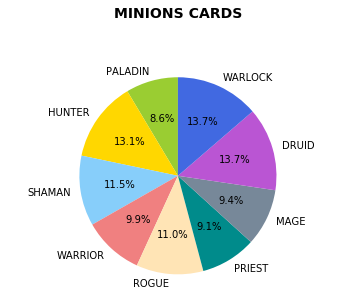

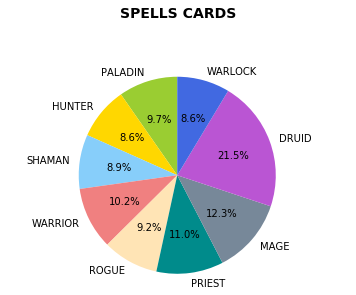

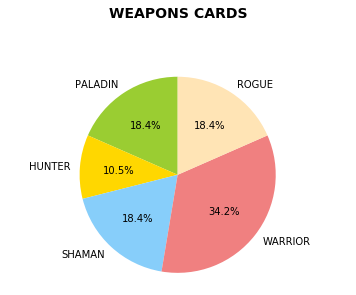

In [76]:
plot_data = dict()
a = hs_cards.groupby([ 'player_class','type']).size()
for pl_class in set(cc['player_class']):
    weapons = a[pl_class]['WEAPON'] if 'WEAPON' in a[pl_class] else 0
    spell = a[pl_class]['SPELL'] if 'SPELL' in a[pl_class] else 0
    minion = a[pl_class]['MINION'] if 'MINION' in a[pl_class] else 0
    if pl_class != 'NEUTRAL':
        plot_data[pl_class] = (minion, spell, weapons)

labels = ['PALADIN', 'HUNTER', 'SHAMAN', 'WARRIOR', 'ROGUE', 'PRIEST', 'MAGE', 'DRUID', 'WARLOCK']
minions_sizes = [plot_data[x][0] for x in labels]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'moccasin', 'darkcyan', 'lightslategrey', 'mediumorchid', 'royalblue']

plt.figure(0)
plt.pie(minions_sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors )
plt.title('MINIONS CARDS', fontsize=14, fontweight='bold', y = 1.2)
plt.axis('equal')

plt.figure(1)
plt.title('SPELLS CARDS', fontsize=14, fontweight='bold', y = 1.2)
plt.pie([plot_data[x][1] for x in labels], labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
plt.axis('equal');

plt.figure(2)
plt.title('WEAPONS CARDS', fontsize=14, fontweight='bold', y = 1.2)
weapon_labels = ['PALADIN', 'HUNTER', 'SHAMAN', 'WARRIOR', 'ROGUE']
plt.pie([plot_data[x][2] for x in weapon_labels], labels=weapon_labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
plt.axis('equal');